# Customer's interest on Vehicle Insurance (Smote Model).

In [1]:
## Font Style

BOLD   = "\033[1m"
RESET  = "\033[0m"

RED    = "\033[31m"
GREEN = "\033[32m"
CYAN    = "\033[36m"

# Libraries:-

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sqlalchemy import create_engine
import mysql.connector as sql
import pymysql

### The goal is to Predict whether a customer would be interested in Vehicle Insurance or not !!!

# Data Description:-



* <b>id</b>: The id of each records.
* <b>Bank_id</b>: Bank identification code.
* <b>Gender</b>: Gender of the customer. (Male, Female)
* <b>Age</b>: Age of the customer.
* <b>Driving_License</b>: Driving License have or not? (0= Do not have , 1= Have)
* <b>Region_Code</b>: Region Code.
* <b>Previously_Insured</b>: Previously_Insured or not? (0= Not Insured , 1= Insured)
* <b>Vehicle_Age</b>: Vehicle Age.
* <b>Vehicle_Damage</b>: Vehicle Damaged or not? (No, Yes)
* <b>Annual_Premium</b>: Annual Premium.
* <b>Policy_Sales_Channel</b>: 
* <b>Vintage</b>: 
* <b>Response</b>: Customer interested for the vehicle insurance or not? (0= Not interested , 1= interested)

*******************************************
*******************************************

In [4]:
# Supressing the warning messages
import warnings
warnings.filterwarnings('ignore')

# Reading Data from a MySQL database & Removing duplicate rows if any:- 

In [5]:
UserName='root'
Password='MySql@1234'
DatabaseName='vehicle_insurance'

# Creating the database connection
db_connection_str = "mysql+pymysql://"+UserName+ ":" +Password +"@localhost/"+ DatabaseName
db_connection = create_engine(db_connection_str)

# Import data from MySql.
Vehicle_Insurance_Data = pd.read_sql('''select c.Gender, c.Age, c.Driving_License, i.* 
                                            from customer_data c inner join insurance_data i 
                                            on c.id = i.id where Bank_id = 'AL254' ; ''', con=db_connection)

print(BOLD, 'Shape before deleting duplicate values:', Vehicle_Insurance_Data.shape, RESET)

# Removing duplicate rows if any
Vehicle_Insurance_Data= Vehicle_Insurance_Data.drop_duplicates()
print(BOLD, 'Shape After deleting duplicate values:', Vehicle_Insurance_Data.shape, RESET)

# Data Backup
DATA_BACKUP= Vehicle_Insurance_Data

print(BOLD, 'So this file contains {} details.'.format(len(Vehicle_Insurance_Data.index)), RESET)

# Printing sample data
Vehicle_Insurance_Data.head(10)

 Shape before deleting duplicate values: (715, 13) 
 Shape After deleting duplicate values: (714, 13) 
 So this file contains 714 details. 


,Gender,Age,Driving_License,id,Bank_id,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,22.0,1,167647,AL254,7,1,< 1 Year,No,2630,152,16,0
2,Male,42.0,1,17163,AL254,28,0,1-2 Year,Yes,43327,26,135,0
3,Female,66.0,1,32023,AL254,33,0,1-2 Year,Yes,35841,124,253,0
4,Female,22.0,1,87447,AL254,33,0,< 1 Year,No,27645,152,69,0
5,Male,28.0,1,501933,AL254,46,1,< 1 Year,No,29023,152,211,0
6,Female,25.0,1,295775,AL254,25,1,< 1 Year,No,27954,152,23,0
7,Male,51.0,1,71711,AL254,8,0,1-2 Year,Yes,2630,26,209,0
8,Male,38.0,1,331781,AL254,28,1,1-2 Year,No,2630,26,51,0
9,Female,45.0,1,290704,AL254,28,0,1-2 Year,Yes,55873,124,262,0
10,Male,42.0,1,344792,AL254,28,0,1-2 Year,Yes,27801,122,217,1


# Problem Statement:-
### Create a predictive model which can tell if a customer interested in Vehicle Insurance or not ?



* <b>Target Variable:</b> Response.
* <b>Predictors:</b> Gender, Age, Driving_License etc.


* <b>Response = 0</b> The customer is not interested.
* <b>Response = 1</b> The customer is interested.


# Determining the type of Machine Learning:-
As per the problem statement I need to create a <b>supervised ML classification model</b>, as the target variable is categorical.

# Looking at the distribution of Target variable:-

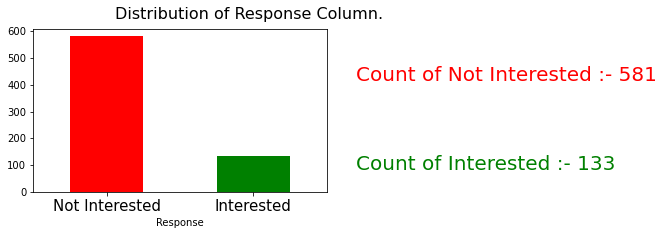

In [6]:
# Inputs.
inpdata        =  Vehicle_Insurance_Data
column_name    =  'Response'
category       =  ['Not interested','interested']
category_color =  ['red','green']

category= [i.title() for i in category]

# Grouped Bar plot & Category Values
fig= plt.figure(figsize= (16,5))
fig.suptitle("Distribution of {} Column.".format(column_name), fontsize=16)

ax1 = plt.subplot2grid(shape=(2,6), loc=(0, 0), colspan=4,rowspan=2)
inpdata.groupby(column_name).size().plot(kind='bar', color=category_color,figsize=(8,3))
plt.xticks(ticks= range(len(category)), labels= [i.title() for i in category], fontsize = 15, rotation=0)

for i in range(len(category)):
    ax2 = plt.subplot2grid(shape=(2,6), loc=(i,4),colspan=2 ,rowspan=i+1)
    ax2.text(0.115,0.3, "Count of "+category[i].title()+' :- '+str(inpdata.groupby(column_name).size()[i]),color=category_color[i],fontsize=20,ha='left')
    ax2.axis('off')
plt.show()

### The data distribution of the target variable is not satisfactory to proceed further. There are not sufficient number of rows, for one category to learn from. It is a imbalancec data

# Basic Data Exploration:-

In [7]:
# Sample rows in the data
Vehicle_Insurance_Data.head()

,Gender,Age,Driving_License,id,Bank_id,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,22.0,1,167647,AL254,7,1,< 1 Year,No,2630,152,16,0
2,Male,42.0,1,17163,AL254,28,0,1-2 Year,Yes,43327,26,135,0
3,Female,66.0,1,32023,AL254,33,0,1-2 Year,Yes,35841,124,253,0
4,Female,22.0,1,87447,AL254,33,0,< 1 Year,No,27645,152,69,0
5,Male,28.0,1,501933,AL254,46,1,< 1 Year,No,29023,152,211,0


In [8]:
# Observing data types, Number of Missing values, Total rows etc.
Vehicle_Insurance_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 714
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Gender                706 non-null    object 
 1   Age                   708 non-null    float64
 2   Driving_License       714 non-null    int64  
 3   id                    714 non-null    int64  
 4   Bank_id               714 non-null    object 
 5   Region_Code           714 non-null    int64  
 6   Previously_Insured    714 non-null    int64  
 7   Vehicle_Age           714 non-null    object 
 8   Vehicle_Damage        714 non-null    object 
 9   Annual_Premium        714 non-null    int64  
 10  Policy_Sales_Channel  714 non-null    int64  
 11  Vintage               714 non-null    int64  
 12  Response              714 non-null    int64  
dtypes: float64(1), int64(8), object(4)
memory usage: 78.1+ KB


In [9]:
# Observing Descriptive statistics of the data
Vehicle_Insurance_Data.describe(include='all')

,Gender,Age,Driving_License,id,Bank_id,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,706,708.000000,714.000000,714.000000,714,714.000000,714.000000,714,714,714.000000,714.000000,714.000000,714.000000
unique,2,NaN,NaN,NaN,1,NaN,NaN,3,2,NaN,NaN,NaN,NaN
top,Male,NaN,NaN,NaN,AL254,NaN,NaN,1-2 Year,No,NaN,NaN,NaN,NaN
freq,386,NaN,NaN,NaN,714,NaN,NaN,367,383,NaN,NaN,NaN,NaN
mean,NaN,37.539548,0.998599,235655.869748,NaN,27.235294,0.511204,NaN,NaN,29943.089636,115.354342,150.561625,0.186275
std,NaN,15.144747,0.037424,140870.395923,NaN,13.449739,0.500225,NaN,NaN,15745.502836,52.171276,85.708382,0.389601
min,NaN,20.000000,0.000000,1477.000000,NaN,0.000000,0.000000,NaN,NaN,2630.000000,1.000000,10.000000,0.000000
25%,NaN,24.000000,1.000000,115762.750000,NaN,15.000000,0.000000,NaN,NaN,24207.000000,121.250000,75.250000,0.000000
50%,NaN,33.000000,1.000000,234777.000000,NaN,28.000000,1.000000,NaN,NaN,30439.000000,152.000000,151.000000,0.000000
75%,NaN,48.250000,1.000000,349109.500000,NaN,36.750000,1.000000,NaN,NaN,38525.250000,152.000000,224.000000,0.000000


In [9]:
# Finding unique values for each column, to get a idea of which column is categorical and which one is Continuous.
Vehicle_Insurance_Data.nunique()

Gender                    2
Age                      59
Driving_License           2
id                      714
Bank_id                   1
Region_Code              51
Previously_Insured        2
Vehicle_Age               3
Vehicle_Damage            2
Annual_Premium          594
Policy_Sales_Channel     37
Vintage                 261
Response                  2
dtype: int64

# Basic Data Exploration Results:-

Based on the basic exploration above, noting down the observations regarding each column.
The selected columns in this step are not final, further study will be done and then a final list will be created.

* <b>Response</b>: This is the Target Variable!
* <b>id</b>: Qualitative. Rejected
* <b>Bank_id</b>: Qualitative. Rejected
* <b>Gender</b>: Categorical. Selected.
* <b>Age</b>: Continuous. Selected.
* <b>Driving_License</b>: Categorical. Selected.
* <b>Region_Code</b>: Qualitative. Rejected
* <b>Previously_Insured</b>: Categorical. Selected.
* <b>Vehicle_Age</b>: Categorical. Selected.
* <b>Vehicle_Damage</b>: Categorical. Selected.
* <b>Annual_Premium</b>: Continuous. Selected.
* <b>Policy_Sales_Channel</b>: Qualitative. Rejected
* <b>Vintage</b>: Qualitative. Rejected

# Creating Variable:-

In [10]:
# Target Column
TARGET_COLUMN_NAME= 'Response'

# All Continuous Column
CONTINUOUS_COLUMN_NAMES= ['Age', 'Annual_Premium']

# All Categorical Column
CATEGORICAL_COLUMN_NAMES= ['Gender', 'Driving_License', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage']

# Useless Columns
Useless_Columns = ['id','Bank_id','Region_Code','Vintage','Policy_Sales_Channel']

# Removing useless columns from the data:-

In [11]:
# Deleting those columns which are not useful in predictive analysis as these variables are qualitative.
Vehicle_Insurance_Data = Vehicle_Insurance_Data.drop(Useless_Columns,axis=1)

# Sample Data.
Vehicle_Insurance_Data.head()

,Gender,Age,Driving_License,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Response
0,Male,22.0,1,1,< 1 Year,No,2630,0
2,Male,42.0,1,0,1-2 Year,Yes,43327,0
3,Female,66.0,1,0,1-2 Year,Yes,35841,0
4,Female,22.0,1,0,< 1 Year,No,27645,0
5,Male,28.0,1,1,< 1 Year,No,29023,0


# Visual Exploratory Data Analysis:-

### Bar Plot for Categorical Predictors: 

In [12]:
# Creating a function which can plot all the Bar Charts at once.
def Plot_Bar_Charts(BAR_inpData, BAR_categorical_columns):    
    %matplotlib inline 
    total_rows = 1
    try: 
        fig, subPlot=plt.subplots(nrows=total_rows, ncols=int(np.ceil(len(BAR_categorical_columns)/total_rows)), figsize=(19,6))    
        fig.suptitle('Bar charts of:- ' + str(BAR_categorical_columns), fontsize = 20)    

        for plotNumber, colName in enumerate(list(BAR_categorical_columns)):
            BAR_inpData.groupby(colName).size().plot(kind='bar',ax= subPlot.flatten()[plotNumber], title=colName, fontsize = 12,rot= 0)
    except:
        print('Some thing is #### WRONG ####')

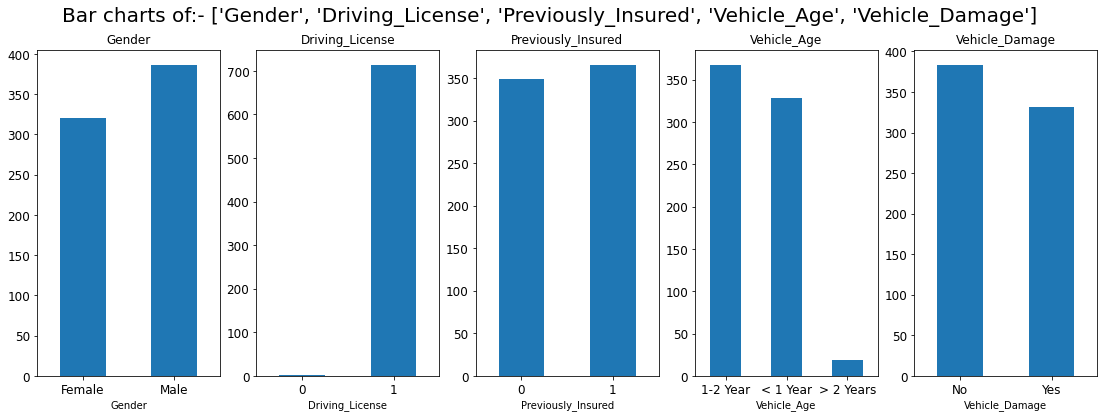

In [13]:
# Calling the function to plot all the Bar Plots at once.
Plot_Bar_Charts(BAR_inpData= Vehicle_Insurance_Data, BAR_categorical_columns= CATEGORICAL_COLUMN_NAMES)   

### Histogram for Continuous Predictor variables:

In [14]:
# Creating a function which can plot all the Histogram at once.
def plot_hist_charts(HIST_inpdata,HIST_column_name):    
    %matplotlib inline
    total_rows= 1
    try:
        HIST_inpdata.hist(column= CONTINUOUS_COLUMN_NAMES, figsize=(10,6), layout=(total_rows,int(np.ceil(len(CONTINUOUS_COLUMN_NAMES)/total_rows))))
        plt.suptitle('Histogram of :-'+ str(CONTINUOUS_COLUMN_NAMES), fontsize = 20)
        plt.show()
    except:
        print('Some thing is #### WRONG ####')

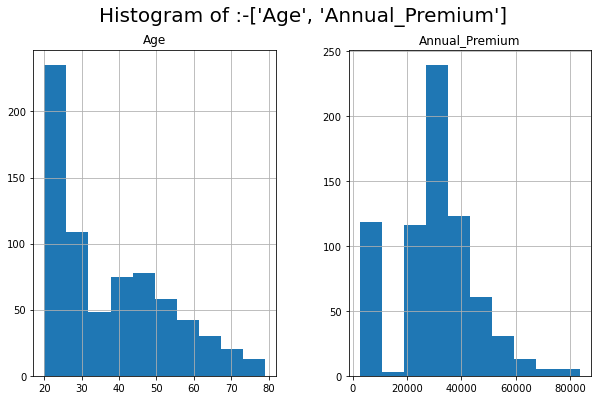

In [15]:
# Calling the function to plot all the Histogram at once.
plot_hist_charts(HIST_inpdata= Vehicle_Insurance_Data, HIST_column_name= CONTINUOUS_COLUMN_NAMES)

## Histogram Interpretation
* <b>Age</b> :  The distribution is good.
* <b>Annual_Premium</b>:  There could be otliers.

# Outlier checking:-

### Checking outliers for 'Annual_Premium'

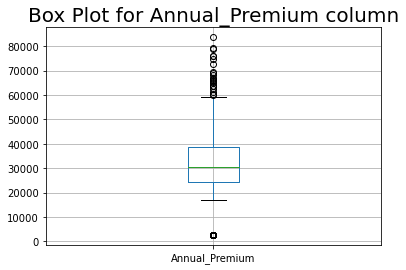

In [16]:
# Box Plot: Checking outliers
inpdata     = Vehicle_Insurance_Data
column_name = 'Annual_Premium'

#plt.boxplot(TitanicSurvivalData['Fare'] , vert=False)
inpdata.boxplot(column= column_name)  #, vert=False)
plt.title('Box Plot for {} column'.format(column_name), fontsize = 20)
plt.show()

### Finding the nearest logical value of 79362, for outliers treatment.

In [17]:
# Finding nearest values to 600000 mark
Vehicle_Insurance_Data['Annual_Premium'][Vehicle_Insurance_Data['Annual_Premium']<85000].sort_values(ascending=False)

146    83666
115    79362
118    78749
454    76197
51     75958
       ...  
354     2630
346     2630
234     2630
340     2630
0       2630
Name: Annual_Premium, Length: 714, dtype: int64

### Above result shows the nearest logical value is 79362, hence, replacing any value above 79362 with it.

In [18]:
# Replacing outliers with nearest logical value.
Vehicle_Insurance_Data['Annual_Premium'][Vehicle_Insurance_Data['Annual_Premium']>79362] = 79362

## Visualizing distribution after outlier treatment

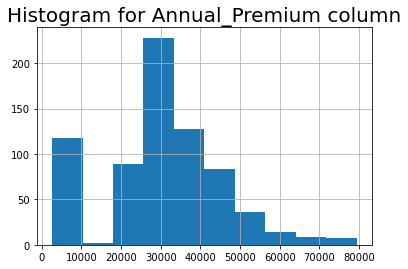

In [19]:
# Histogram: After outlier treatment.
inpdata     = Vehicle_Insurance_Data
column_name = 'Annual_Premium'

inpdata[column_name].hist()
plt.title('Histogram for {} column'.format(column_name), fontsize = 20)
plt.show()

# Missing values treatment:-

In [20]:
# Finding how many missing values are there for each column
Vehicle_Insurance_Data.isnull().sum()

Gender                8
Age                   6
Driving_License       0
Previously_Insured    0
Vehicle_Age           0
Vehicle_Damage        0
Annual_Premium        0
Response              0
dtype: int64

#### I am using Median and Mode value for the missing value replacement.

In [21]:
# Treating missing values of continuous variable with Median value
Vehicle_Insurance_Data['Age'].fillna(Vehicle_Insurance_Data['Age'].median(), inplace=True)

In [22]:
# Treating missing values of categorical variable with MODE value
Vehicle_Insurance_Data['Gender'].fillna(Vehicle_Insurance_Data['Gender'].mode()[0], inplace=True)

In [23]:
# Checking missing values again after the treatment
Vehicle_Insurance_Data.isnull().sum()

Gender                0
Age                   0
Driving_License       0
Previously_Insured    0
Vehicle_Age           0
Vehicle_Damage        0
Annual_Premium        0
Response              0
dtype: int64

# Feature Selection:-
Select the best columns(Features) which are correlated to the Target variable.
This can be done directly by measuring the correlation values & Chi-Square Tests. However, it is always helpful to visualize the relation between the Target variable and each of the predictors to get a better idea of data.

## Relationship exploration: Categorical Vs Continuous -- Box Plots:-

In [24]:
# Creating a function which can plot all the Box Plots at once.
def plot_box_charts(data,target_variable,continuous_columns):
    total_rows= 1
    try:
        fig, PlotCanvas=plt.subplots(nrows=total_rows, ncols=int(np.ceil(len(continuous_columns)/total_rows)), figsize=(16,5))
        fig.suptitle('Box Plot of:- ' )#+ str(target_variable) +' vs ' + str(continuous_columns), fontsize = 20) 

        for i, PredictorCol in enumerate(list(continuous_columns)):
            data.boxplot(column=PredictorCol, by=target_variable, vert=True, ax=PlotCanvas.flatten()[i],fontsize= 15) 
    except:
        print('')

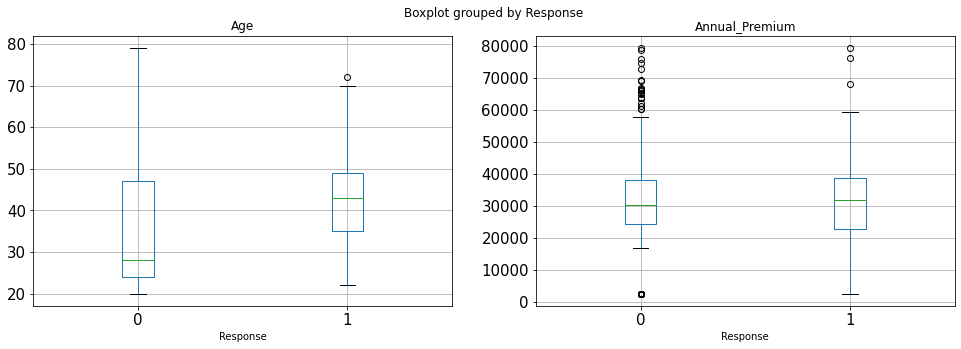

In [25]:
# Calling the function to plot all the Box Plots at once. 
plot_box_charts(data= Vehicle_Insurance_Data, target_variable= TARGET_COLUMN_NAME, continuous_columns= CONTINUOUS_COLUMN_NAMES) 

## Statistical Feature Selection (Categorical Vs Continuous) using ANOVA test:-

In [26]:
# Defining a function to find the statistical relationship with all the categorical variables

def FunctionAnova(inpData, TargetVariable, continuous_Predictor_List):
    from scipy.stats import f_oneway
    
    # Creating an empty list of final selected predictors
    Selected_Continuous_Predictors=[]

    print(BOLD, '##### ANOVA Results ##### \n',RESET)
    for predictor in continuous_Predictor_List:
        CategoryGroupLists=inpData.groupby(TargetVariable)[predictor].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        if (AnovaResults[1] < 0.05):
            print(BOLD,'**  ', predictor, RESET , GREEN,'is correlated with',RESET, TargetVariable, '||  P-Value:', GREEN,BOLD, AnovaResults[1], RESET)
            Selected_Continuous_Predictors.append(predictor)
        else:
            print(predictor,  RED,'is NOT correlated with',RESET, TargetVariable, '|| P-Value:',RED,BOLD, AnovaResults[1],RESET)
    print('\n\n',BOLD,'    Final Selected Continuous Columns:-\n\n',RESET,'    ',BOLD,'****',RESET,Selected_Continuous_Predictors)
    return(Selected_Continuous_Predictors)

In [27]:
# Calling the function to check which categorical variables are correlated with target variable
SELECTED_CONTINUOUS_COLUMNS= FunctionAnova(inpData= Vehicle_Insurance_Data, TargetVariable= TARGET_COLUMN_NAME, 
                                                        continuous_Predictor_List= CONTINUOUS_COLUMN_NAMES)

 ##### ANOVA Results ##### 
 
 **   Age   is correlated with  Response ||  P-Value:   2.1072939606884115e-06 
Annual_Premium  is NOT correlated with  Response || P-Value:   0.5622062024742883 


      Final Selected Continuous Columns:-

        ****  ['Age']


## Relationship exploration: Categorical Vs Categorical -- Grouped Bar Charts:-

In [28]:
# Creating a function which can plot all the Bar Charts at once.
def Plot_Bar_Charts(BAR_inpData, TargetVariable, BAR_categorical_columns):    
    %matplotlib inline    
    total_rows = 2
    category_color =  ['red','green']
    legend_text = ['Not interested','interested']    
    try: 
        fig, subPlot=plt.subplots(nrows=total_rows, ncols=int(np.ceil(len(BAR_categorical_columns)/total_rows)), figsize=(16,10) )    

        for i, CategoricalCol in enumerate(list(BAR_categorical_columns)):
            CrossTabResult=pd.crosstab(index=BAR_inpData[CategoricalCol], columns=BAR_inpData[TargetVariable])
            CrossTabResult.plot.bar(color=category_color, ax=subPlot.flatten()[i], title=(CategoricalCol+' Vs '+TargetVariable),rot = 0)
            subPlot.flatten()[i].legend(legend_text, fontsize= 12)
    except:
        print('Some thing is #### WRONG ####')        

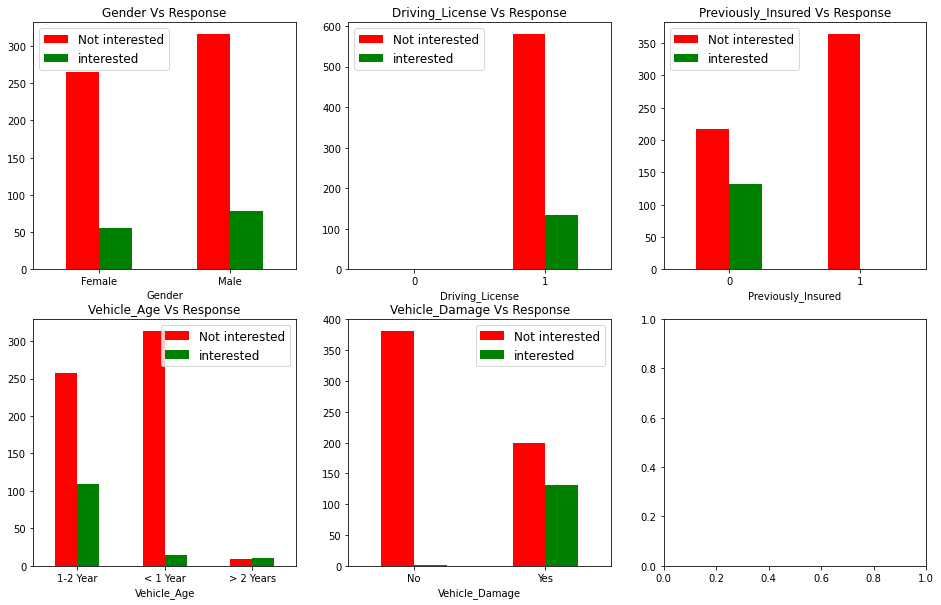

In [29]:
# Calling the function to plot all the Bar Plots at once.
Plot_Bar_Charts(BAR_inpData= Vehicle_Insurance_Data, TargetVariable= TARGET_COLUMN_NAME, BAR_categorical_columns= CATEGORICAL_COLUMN_NAMES)  

## Statistical Feature Selection (Categorical Vs Categorical) using Chi-Square Test:-

In [30]:
# Writing a function to find the correlation of all categorical variables with the Target variable
def FunctionChisq(inpData, TargetVariable, Categorical_Predictor_List):
    from scipy.stats import chi2_contingency
    
    # Creating an empty list of final selected predictors
    Selected_CATEGORICAL_Predictors=[]

    print(BOLD, '##### CHI-SQUARE Results ##### \n',RESET)
    for predictor in Categorical_Predictor_List:
        CrossTabResult=pd.crosstab(index=inpData[TargetVariable], columns=inpData[predictor])
        ChiSqResult = chi2_contingency(CrossTabResult)
        
        # If the ChiSq P-Value is <0.05, that means we reject H0
        if (ChiSqResult[1] < 0.05):
            print(BOLD,'**  ', predictor, RESET , 'is correlated with', TargetVariable, '| P-Value:', GREEN,BOLD, ChiSqResult[1], RESET)
            Selected_CATEGORICAL_Predictors.append(predictor)
        else:
            print(BOLD, predictor, RESET , 'is NOT correlated with', TargetVariable, '| P-Value:', RED,BOLD, ChiSqResult[1], RESET)        
    print('\n\n',BOLD,'    Final Selected Categorical Columns:-\n\n',RESET,'    ',BOLD,'****',RESET,Selected_CATEGORICAL_Predictors)
    return(Selected_CATEGORICAL_Predictors)

In [31]:
# Calling the function
SELECTED_CATEGORICAL_COLUMNS= FunctionChisq(inpData= Vehicle_Insurance_Data, TargetVariable= TARGET_COLUMN_NAME, Categorical_Predictor_List= CATEGORICAL_COLUMN_NAMES)

 ##### CHI-SQUARE Results ##### 
 
 Gender  is NOT correlated with Response | P-Value:   0.4271915149154265 
 Driving_License  is NOT correlated with Response | P-Value:   0.4200251400525198 
 **   Previously_Insured  is correlated with Response | P-Value:   1.965296281898353e-37 
 **   Vehicle_Age  is correlated with Response | P-Value:   5.223956578940385e-20 
 **   Vehicle_Damage  is correlated with Response | P-Value:   2.5800544067354494e-41 


      Final Selected Categorical Columns:-

        ****  ['Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage']


In [32]:
print('Selected',BOLD,'Categorical',RESET,'Columns are:-',BOLD, SELECTED_CATEGORICAL_COLUMNS ,  RESET)
print('Selected',BOLD ,'Continuous',RESET,'Columns are:-', BOLD,  SELECTED_CONTINUOUS_COLUMNS ,  RESET)

Selected  Categorical  Columns are:-  ['Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage'] 
Selected  Continuous  Columns are:-  ['Age'] 


# Selecting final predictors for Machine Learning:-

In [33]:
# Combining Selected columns.
SelectedColumns= SELECTED_CONTINUOUS_COLUMNS + SELECTED_CATEGORICAL_COLUMNS
print(BOLD,'\nSelected final predictors for Machine Learning:-',RESET,SelectedColumns)

# Selecting final columns
DataForML=Vehicle_Insurance_Data[SelectedColumns]
DataForML.head()

 
Selected final predictors for Machine Learning:-  ['Age', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage']


,Age,Previously_Insured,Vehicle_Age,Vehicle_Damage
0,22.0,1,< 1 Year,No
2,42.0,0,1-2 Year,Yes
3,66.0,0,1-2 Year,Yes
4,22.0,0,< 1 Year,No
5,28.0,1,< 1 Year,No


# Saving the final data for reference during deployment:-

In [34]:
DataForML.to_pickle('DataForML.pkl')

# Converting the binary nominal variable to numeric using 1/0 mapping:-

In [35]:
# Converting the binary nominal variable Vehicle_Damage to numeric
DataForML['Vehicle_Damage'].replace({'No':0, 'Yes':1}, inplace=True)

# Converting the nominal variable to numeric using get_dummies():-

In [37]:
# Treating all the nominal variables at once using dummy variables
DataForML_Numeric=pd.get_dummies(DataForML)

# Adding Target Variable to the data
DataForML_Numeric['Response']=Vehicle_Insurance_Data['Response']

# Printing sample rows
DataForML_Numeric.head()

,Age,Previously_Insured,Vehicle_Damage,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Response
0,22.0,1,0,0,1,0,0
2,42.0,0,1,1,0,0,0
3,66.0,0,1,1,0,0,0
4,22.0,0,0,0,1,0,0
5,28.0,1,0,0,1,0,0


# Machine Learning: Splitting the data into Training and Testing sample:-

In [38]:
# Printing all the column names for our reference
DataForML_Numeric.columns

Index(['Age', 'Previously_Insured', 'Vehicle_Damage', 'Vehicle_Age_1-2 Year',
       'Vehicle_Age_< 1 Year', 'Vehicle_Age_> 2 Years', 'Response'],
      dtype='object')

In [39]:
# Separate Target Variable and Predictor Variables
TargetVariable= TARGET_COLUMN_NAME
Predictors = DataForML_Numeric.columns[DataForML_Numeric.columns!=TARGET_COLUMN_NAME]

print('TargetVariable :-', TARGET_COLUMN_NAME)
print('Predictors     :-', Predictors)

TargetVariable=TARGET_COLUMN_NAME
Predictors= DataForML_Numeric.columns[DataForML_Numeric.columns!=TARGET_COLUMN_NAME]

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)

TargetVariable :- Response
Predictors     :- Index(['Age', 'Previously_Insured', 'Vehicle_Damage', 'Vehicle_Age_1-2 Year',
       'Vehicle_Age_< 1 Year', 'Vehicle_Age_> 2 Years'],
      dtype='object')


# Standardization/Normalization of data:-

In [40]:
### Sandardization of data
from sklearn.preprocessing import StandardScaler, MinMaxScaler

PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [41]:
# Checking the shape
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(499, 6)
(499,)
(215, 6)
(215,)


# Handling Class Imbalance:- SMOTE

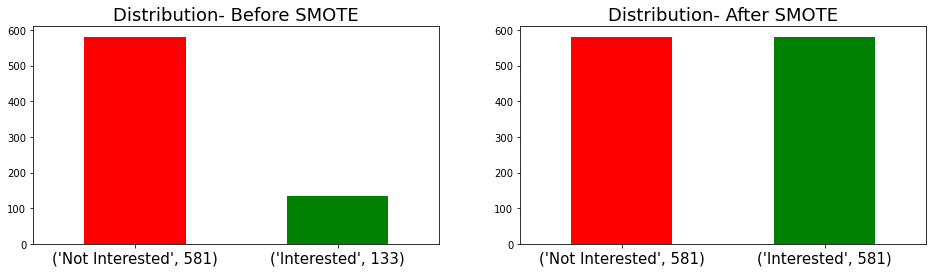

Shape of X_train after SMOTE:  (813, 6)
Shape of y_train after SMOTE:  (813,)
Shape of X_test  after SMOTE:  (349, 6)
Shape of y_test  after SMOTE:  (349,)


In [42]:
#### SMOTE
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_smote, y_smote = sm.fit_resample(X, y)

#### Visualization
fig= plt.figure(figsize= (16,4))

ax1 = plt.subplot2grid(shape=(1,2), loc=(0, 0), colspan=1,rowspan=1)
pd.DataFrame({TargetVariable:[np.bincount(y)[0],np.bincount(y)[1]]})[TargetVariable].plot(kind='bar', color=category_color)
plt.xticks(ticks= range(len(category)), labels= [i for i in zip(category,np.bincount(y))], fontsize = 15, rotation=0)
ax1.title.set_text("Distribution- Before SMOTE")
ax1.title.set_fontsize(18)

ax2 = plt.subplot2grid(shape=(1,2), loc=(0, 1), colspan=1,rowspan=1)
pd.DataFrame({TargetVariable:[np.bincount(y_smote)[0],np.bincount(y_smote)[1]]})[TargetVariable].plot(kind='bar', color=category_color)
plt.xticks(ticks= range(len(category)), labels= [i for i in zip(category,np.bincount(y_smote))], fontsize = 15, rotation=0)
ax2.title.set_text("Distribution- After SMOTE")
ax2.title.set_fontsize(18)
plt.show()

#### Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.3, random_state=42)

# Checking the shape
print('Shape of X_train after SMOTE: ',X_train.shape)
print('Shape of y_train after SMOTE: ',y_train.shape)
print('Shape of X_test  after SMOTE: ',X_test.shape)
print('Shape of y_test  after SMOTE: ',y_test.shape)

# Logistic Regression:-

LogisticRegression(C=5, solver='newton-cg')
              precision    recall  f1-score   support

           0       0.88      0.75      0.81       175
           1       0.78      0.90      0.84       174

    accuracy                           0.83       349
   macro avg       0.83      0.83      0.82       349
weighted avg       0.83      0.83      0.82       349

[[132  18]
 [ 43 156]]

 Accuracy of the model on Testing Sample Data:  0.82 

Accuracy values for 10-fold Cross Validation:
 [0.76121874 0.82222222 0.8450459  0.81470442 0.74041425 0.7780882
 0.80726816 0.7988793  0.80978989 0.8028169 ]

Final Average Accuracy of the model:  0.8 


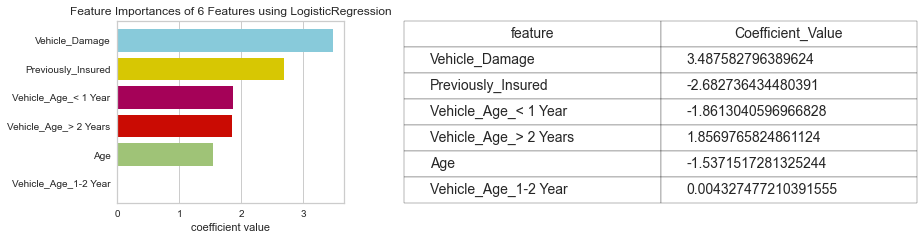

,Response,LR_Predicted_Response
0,0,1
1,0,0
2,1,1
3,0,0
4,1,0


In [45]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(C= 5,penalty= 'l2', solver= 'newton-cg')

# Printing all the parameters of logistic regression
print(clf)

# Creating the model on Training Data
LOG= clf.fit(X_train,y_train)
prediction= LOG.predict(X_test)

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data= X_test, columns= DataForML_Numeric.columns[DataForML_Numeric.columns!=TargetVariable])
TestingDataResults[TargetVariable]= y_test
TestingDataResults[('LR_Predicted_'+TargetVariable)]= np.round(prediction)

# Measuring accuracy on Testing Data & confusion_matrix
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(prediction, y_test))

# Printing the Overall Accuracy of the model
F1_Score= metrics.f1_score(y_test, prediction, average='weighted')
print('\n Accuracy of the model on Testing Sample Data:', BOLD,round(F1_Score,2),RESET)

##############################################################################
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
Accuracy_Values=cross_val_score(clf, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', BOLD,round(Accuracy_Values.mean(),2),RESET)

##############################################################################################
# Feature Importances & Coed Data Frame
from yellowbrick.model_selection import FeatureImportances
fig = plt.figure(figsize=(13,3.5))
  
ax1 = plt.subplot2grid(shape=(1,6), loc=(0, 0), colspan=2)
viz = FeatureImportances(clf, labels= Predictors, relative= False, absolute= True)
viz.fit(X, y)

# # Create Coef Data Frame
feature_importance= pd.DataFrame(data= Predictors, columns=['feature'] )
feature_importance['Coefficient_Value']= (viz.coef_.reshape(int(len(Predictors)/1) , 1 ))
feature_importance['Coefficient_Value_']= abs(viz.coef_.reshape(int(len(Predictors)/1) , 1 ))
feature_importance.sort_values('Coefficient_Value_',ascending= True, inplace= True)

ax2 = plt.subplot2grid(shape=(1,6), loc=(0,2),colspan=4 ,rowspan=1)
mpl_table= ax2.table(cellText= feature_importance[['feature','Coefficient_Value']].values[::-1], colLabels= feature_importance.columns,
                                     bbox= [0, 0, 1, 1], cellLoc= 'left', colWidths= [0.5,0.5])
mpl_table.set_fontsize(14)
ax2.axis('off')
viz.show()
plt.show()

##############################################################################################
LR_Accuracy = F1_Score
LR_CV_Accuracy = Accuracy_Values.mean()
#print(LR_Accuracy,LR_CV_Accuracy)

TestingDataResults[[TargetVariable,'LR_Predicted_'+TargetVariable]].head()

# Decision Trees:-

In [48]:
#Finding out Best Parameters of Decision Tree using GridSearchCV.
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

#Decision Tree Parameters
DT_cla_params = {'max_depth': list(range(1,20,1)), "criterion": ['gini', 'entropy']}

grid_DT_cla = GridSearchCV(DecisionTreeClassifier(), DT_cla_params, cv = 10)
grid_DT_cla.fit(X,y)

# Finding out best parameters.
DT_cla_1 = grid_DT_cla.best_params_

DT_cla_1

{'criterion': 'entropy', 'max_depth': 3}

              precision    recall  f1-score   support

           0       0.92      0.81      0.86       175
           1       0.83      0.93      0.87       174

    accuracy                           0.87       349
   macro avg       0.87      0.87      0.86       349
weighted avg       0.87      0.87      0.86       349

[[141  34]
 [ 13 161]]
Accuracy of the model on Testing Sample Data: 0.86

Accuracy values for 10-fold Cross Validation:
 [0.84876543 0.83170234 0.82196844 0.83667482 0.87050845 0.84792154
 0.81061124 0.85652754 0.84648773 0.80907064]

Final Average Accuracy of the model: 0.84


,Response,DT_Predicted_Response
0,0,0
1,0,0
2,1,1
3,0,0
4,1,1


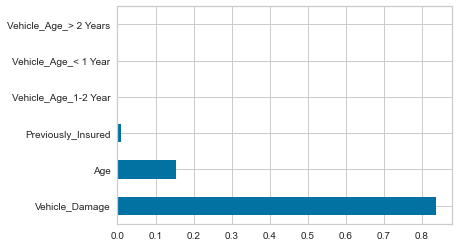

In [51]:
# Decision Trees
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=3,criterion='entropy')

# Printing all the parameters of Decision Trees
# print(clf)

# Creating the model on Training Data
DTree=clf.fit(X_train,y_train)
prediction=DTree.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

TestingDataResults[('DT_Predicted_'+TargetVariable)]=np.round(prediction)

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DTree.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
Accuracy_Values=cross_val_score(clf, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

DT_Accuracy = round(F1_Score,4)
DT_CV_Accuracy = round(Accuracy_Values.mean(),4)
#print(DT_Accuracy,DT_CV_Accuracy)

TestingDataResults[[TargetVariable,'DT_Predicted_'+TargetVariable]].head()

# Plotting a Decision Tree:-

In [52]:
# Installing the required library for plotting the decision tree
# !pip install dtreeplt

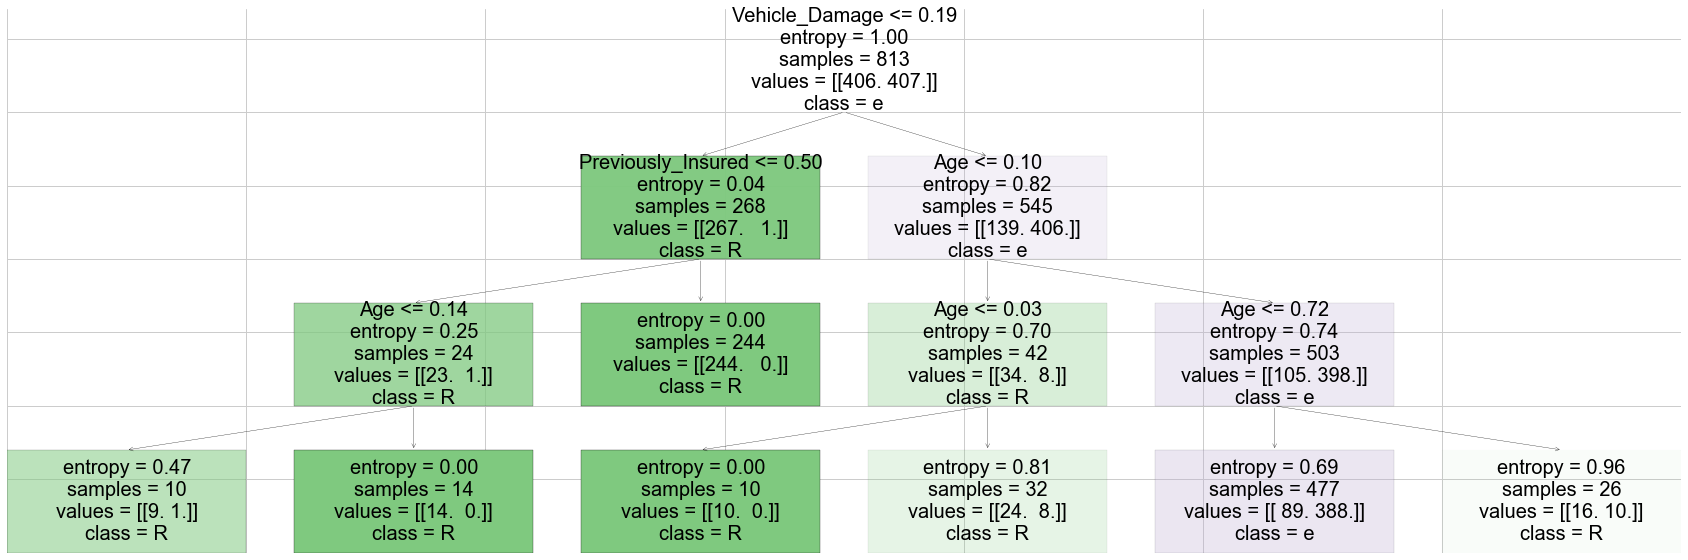

In [56]:
from dtreeplt import dtreeplt
import matplotlib.pyplot as plt
dtree = dtreeplt(model=clf, feature_names=Predictors, target_names=TargetVariable)
fig = dtree.view()
currentFigure=plt.gcf()
currentFigure.set_size_inches(30,10)

# Random Forest:-

In [57]:
# Finding out Best Parameters of Random Forest using GridSearchCV.
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier


# #Random Forest Parameters
# RF_cla_params = {'max_depth': list(range(1,20,1)), "criterion": ['gini', 'entropy'],
#                  'n_estimators': [100,110,150,185,200,225,250,230,270,300,330,350,400,410,450,500,470,170]}

RF_cla_params = {'max_depth': [7,9], "criterion": ['gini'],
                 'n_estimators': [100,110,150,185,200,225,250,230,270,300,330,350,400,410,450,500,470,170]}

grid_RF_cla = GridSearchCV(RandomForestClassifier(), RF_cla_params)#, cv = 10)
grid_RF_cla.fit(X , y)

# Finding out best parameters.
RF_cla_1 = grid_RF_cla.best_params_
print(RF_cla_1)

{'criterion': 'gini', 'max_depth': 9, 'n_estimators': 410}


RandomForestClassifier(max_depth=9, n_estimators=200)
              precision    recall  f1-score   support

           0       0.93      0.79      0.85       175
           1       0.81      0.94      0.87       174

    accuracy                           0.86       349
   macro avg       0.87      0.86      0.86       349
weighted avg       0.87      0.86      0.86       349

[[138  37]
 [ 11 163]]
Accuracy of the model on Testing Sample Data: 0.86

Accuracy values for 10-fold Cross Validation:
 [0.74166667 0.86111111 0.73915627 0.79435282 0.80726816 0.7807194
 0.82754358 0.7780882  0.81949604 0.8028169 ]

Final Average Accuracy of the model: 0.8


,Response,RF_Predicted_Response
0,0,0
1,0,0
2,1,1
3,0,0
4,1,1


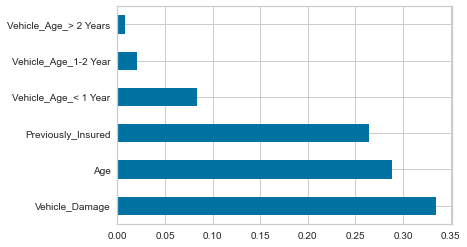

In [67]:
# Random Forest.
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=9, n_estimators=200,criterion='gini')

# Printing all the parameters of Random Forest
print(clf)

# Creating the model on Training Data
RF=clf.fit(X_train,y_train)
prediction=RF.predict(X_test)

TestingDataResults[('RF_Predicted_'+TargetVariable)]=np.round(prediction)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))


# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(RF.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
Accuracy_Values=cross_val_score(clf, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

RF_Accuracy = round(F1_Score,4)
RF_CV_Accuracy = round(Accuracy_Values.mean(),4)
#print(RF_Accuracy,RF_CV_Accuracy)

TestingDataResults[[TargetVariable,'RF_Predicted_'+TargetVariable]].head()

# Plotting one of the Decision Trees in Random Forest:-

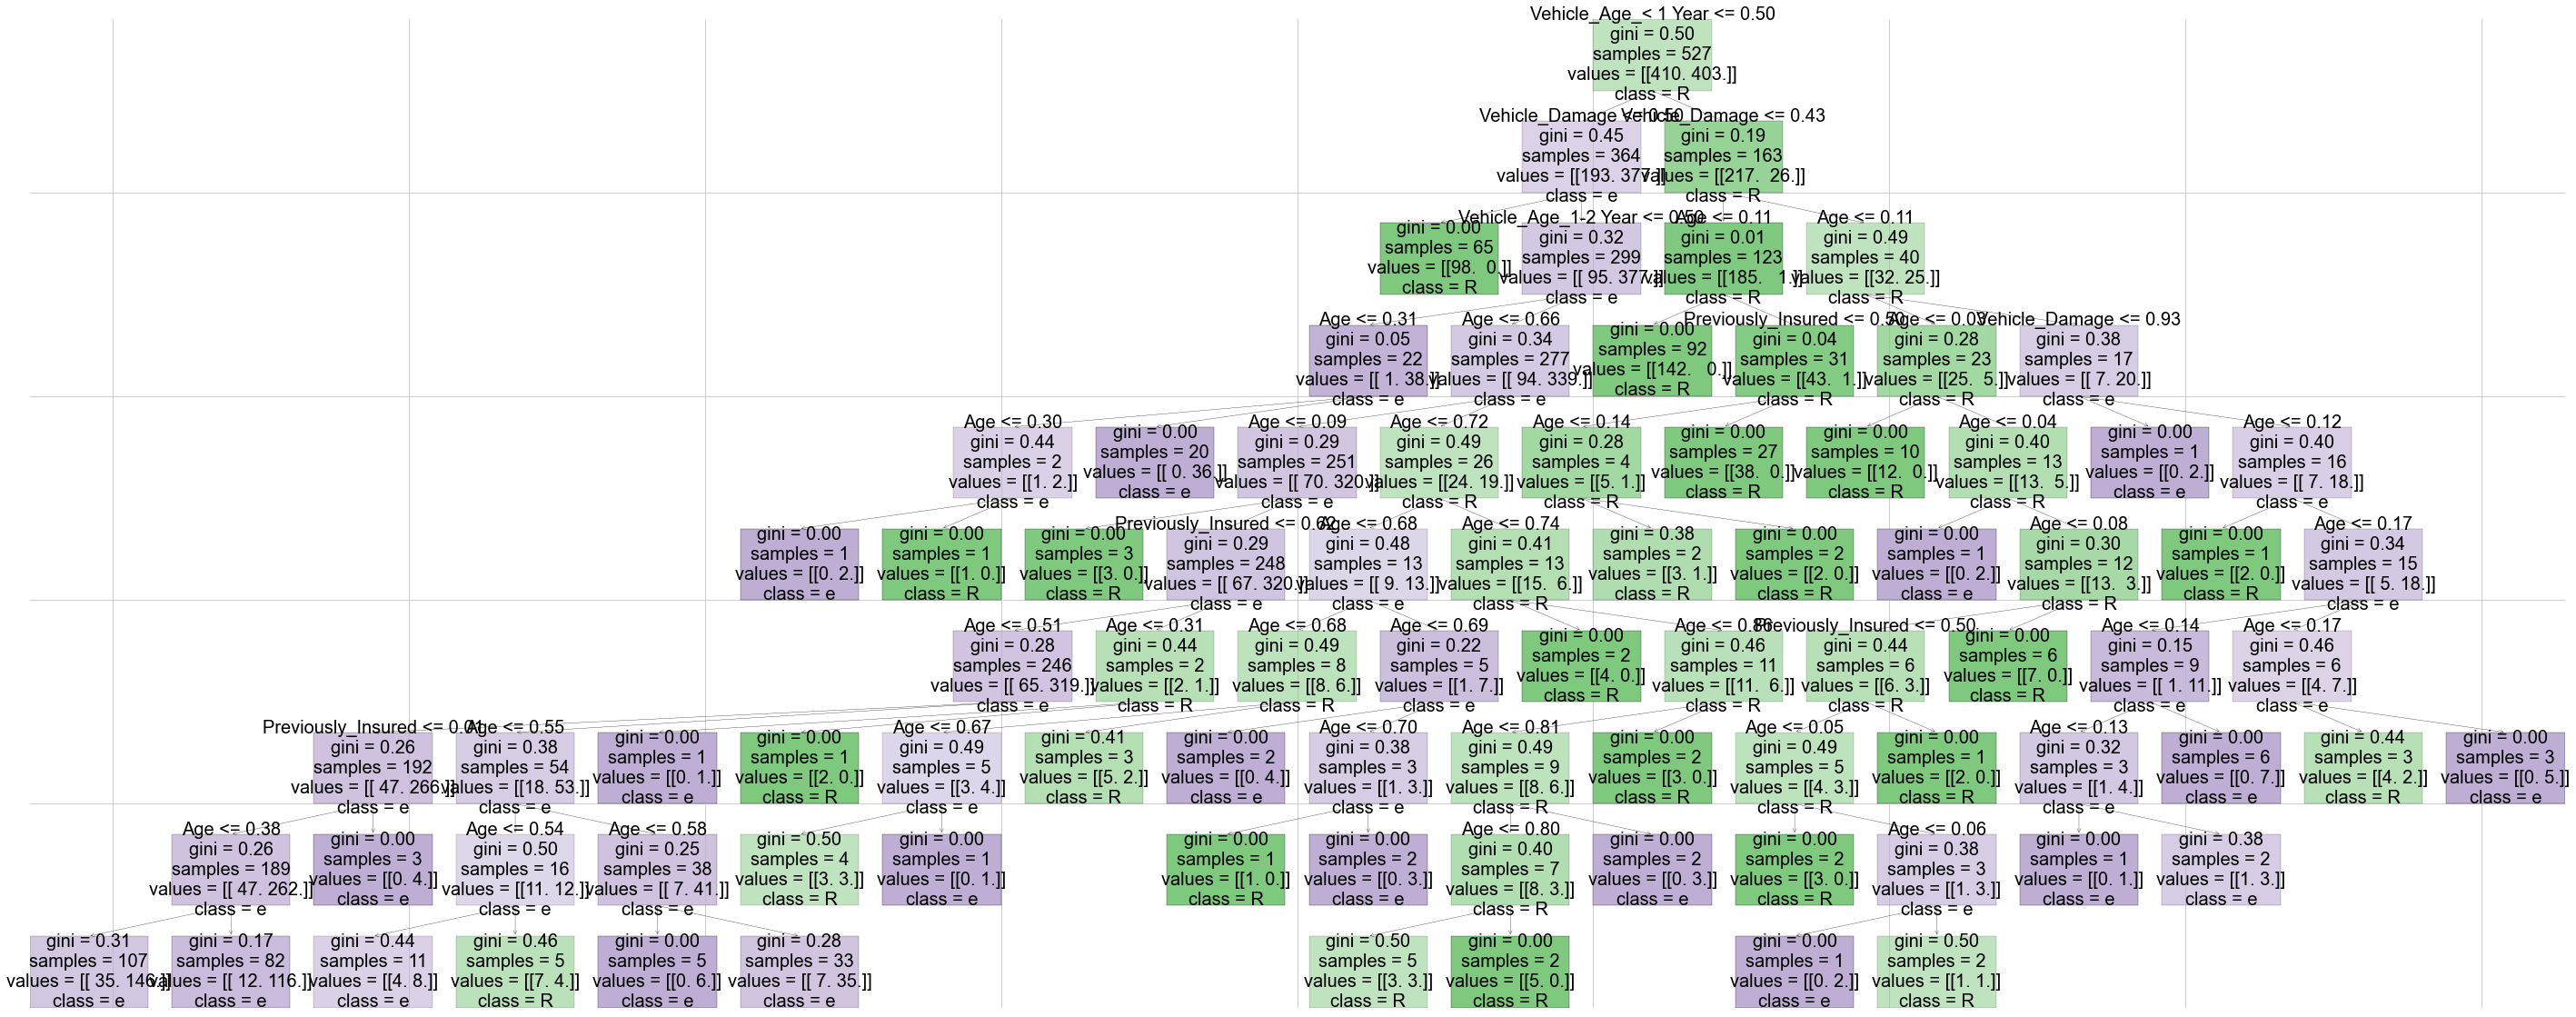

In [68]:
# PLotting a single Decision Tree from Random Forest
from dtreeplt import dtreeplt
dtree = dtreeplt(model=clf.estimators_[5], feature_names=Predictors, target_names=TargetVariable)
fig = dtree.view()
currentFigure=plt.gcf()
currentFigure.set_size_inches(50,20)

# AdaBoost:-

In [69]:
#Finding out Best Parameters of AdaBoost using GridSearchCV.
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

#Random Forest Parameters
DTC2=DecisionTreeClassifier(max_depth=2)
DTC3=DecisionTreeClassifier(max_depth=3)
DTC4=DecisionTreeClassifier(max_depth=4)
#DTC5=DecisionTreeClassifier(max_depth=5)

AB_cla_params= {'learning_rate': [0.01,0.02,0.03,0.04,0.05,0.1,0.2,0.3,0.4,0.5],'base_estimator':[DTC2, DTC3, DTC4] 
                 ,'n_estimators': [100,110,150,185,200,225,250,230,270,300,330,350,400,410,450,500,470,170]}

grid_AB_cla = GridSearchCV(AdaBoostClassifier(), AB_cla_params)#, cv = 10)
grid_AB_cla.fit(X , y)

# Finding out best parameters.
AB_cla_1 = grid_AB_cla.best_params_
print(AB_cla_1)

{'base_estimator': DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best'), 'learning_rate': 0.02, 'n_estimators': 100}


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),
                   learning_rate=0.02, n_estimators=100)
              precision    recall  f1-score   support

           0       0.92      0.80      0.85       175
           1       0.82      0.93      0.87       174

    accuracy                           0.86       349
   macro avg       0.87      0.86      0.86       349
weighted avg       0.87      0.86      0.86       349

[[140  35]
 [ 13 161]]
Accuracy of the model on Testing Sample Data: 0.86

Accuracy values for 10-fold Cross Validation:
 [0.85313177 0.8374269  0.83333333 0.82578425 0.85447999 0.83098592
 0.80101183 0.76794652 0.84263392 0.84222151]

Final Average Accuracy of the model: 0.83


,Response,AB_Predicted_Response
0,0,0
1,0,0
2,1,1
3,0,0
4,1,1


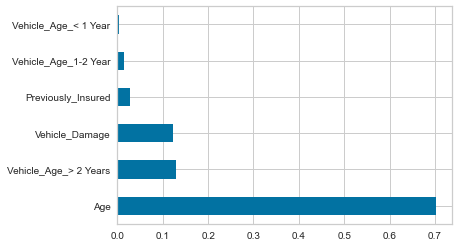

In [71]:
# Adaboost 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Choosing Decision Tree with 4 level as the weak learner
DTC=DecisionTreeClassifier(max_depth=2)
clf = AdaBoostClassifier(n_estimators=100, base_estimator=DTC ,learning_rate=0.02)

# Printing all the parameters of Adaboost
print(clf)

# Creating the model on Training Data
AB=clf.fit(X_train,y_train)
prediction=AB.predict(X_test)

TestingDataResults[('AB_Predicted_'+TargetVariable)]=np.round(prediction)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
Accuracy_Values=cross_val_score(clf, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(AB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

AB_Accuracy = round(F1_Score,4)
AB_CV_Accuracy = round(Accuracy_Values.mean(),4)
#print(AB_Accuracy,AB_CV_Accuracy)

TestingDataResults[[TargetVariable,'AB_Predicted_'+TargetVariable]].head()

# Plotting one of the Decision trees from Adaboost:-

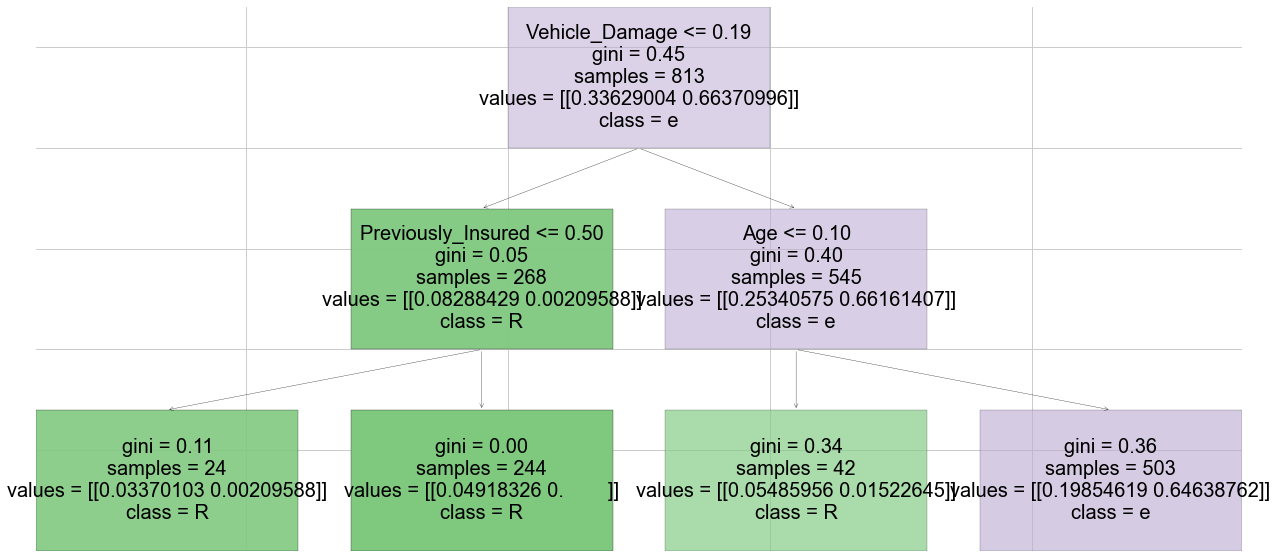

In [72]:
# PLotting 6th single Decision Tree from Adaboost
from dtreeplt import dtreeplt
dtree = dtreeplt(model=clf.estimators_[6], feature_names=Predictors, target_names=TargetVariable)
fig = dtree.view()

# XGBoost:-

In [73]:
#Finding out Best Parameters of XGBoost using GridSearchCV.
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

#XGBoost Parameters
XGB_cla_params = {'max_depth': list(range(1,10,1)), 'learning_rate': [0.01,0.02,0.03,0.04,0.05,0.1,0.2,0.3,0.4,0.5], 
                  'n_estimators':[100,150,200,225,250,275,300,320,340,360,380,400,420,440,460,480,500],
                  'objective': ['binary:logistic'], "booster": ['gbtree'], 'eval_metric': ['Logloss', 'AUC', 'mlogloss'] }

grid_XGB_cla = GridSearchCV(XGBClassifier(), XGB_cla_params) # , cv = 2)
grid_XGB_cla.fit(X , y)

# Finding out best parameters.
XGB_cla_1 = grid_XGB_cla.best_params_
print(XGB_cla_1)

{'booster': 'gbtree', 'eval_metric': 'mlogloss', 'learning_rate': 0.03, 'max_depth': 1, 'n_estimators': 360, 'objective': 'binary:logistic'}


              precision    recall  f1-score   support

           0       0.93      0.79      0.85       175
           1       0.82      0.94      0.87       174

    accuracy                           0.87       349
   macro avg       0.87      0.87      0.86       349
weighted avg       0.87      0.87      0.86       349

[[138  37]
 [ 10 164]]
Accuracy of the model on Testing Sample Data: 0.86

Accuracy values for 10-fold Cross Validation:
 [0.86487411 0.8374269  0.83333333 0.8374269  0.86657027 0.83098592
 0.81244131 0.79888699 0.85915493 0.84222151]

Final Average Accuracy of the model: 0.84


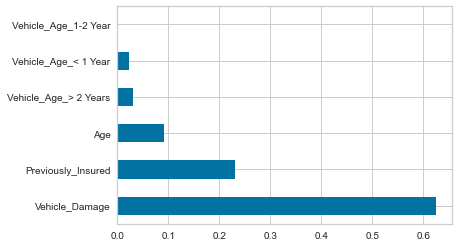

,Response,XB_Predicted_Response
0,0,0
1,0,0
2,1,1
3,0,0
4,1,1


In [73]:
# Xtreme Gradient Boosting (XGBoost)
from xgboost import XGBClassifier
clf=XGBClassifier(max_depth=1, learning_rate=0.03, n_estimators=360, objective='binary:logistic',
                  eval_metric = "mlogloss", booster='gbtree')

# Printing all the parameters of XGBoost
# print(clf)

# Creating the model on Training Data
XGB=clf.fit(X_train,y_train)
prediction=XGB.predict(X_test)

TestingDataResults[('XB_Predicted_'+TargetVariable)]=np.round(prediction)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(clf, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(XGB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')
plt.show()

XB_Accuracy = round(F1_Score,4)
XB_CV_Accuracy = round(Accuracy_Values.mean(),4)
#print(XB_Accuracy,XB_CV_Accuracy)

TestingDataResults[[TargetVariable,'XB_Predicted_'+TargetVariable]].head()

# Plotting a single Decision tree out of XGBoost:-

In [75]:
# !pip install graphviz
# !conda install graphviz
# !pip install pydotplus

In [78]:
# Setting up the os path for the Graphviz
import os 
os.environ["PATH"] += os.pathsep + 'C:\\Users\\Pranab_Kumar_Paul\\anaconda3\\Library\\bin\\graphviz'

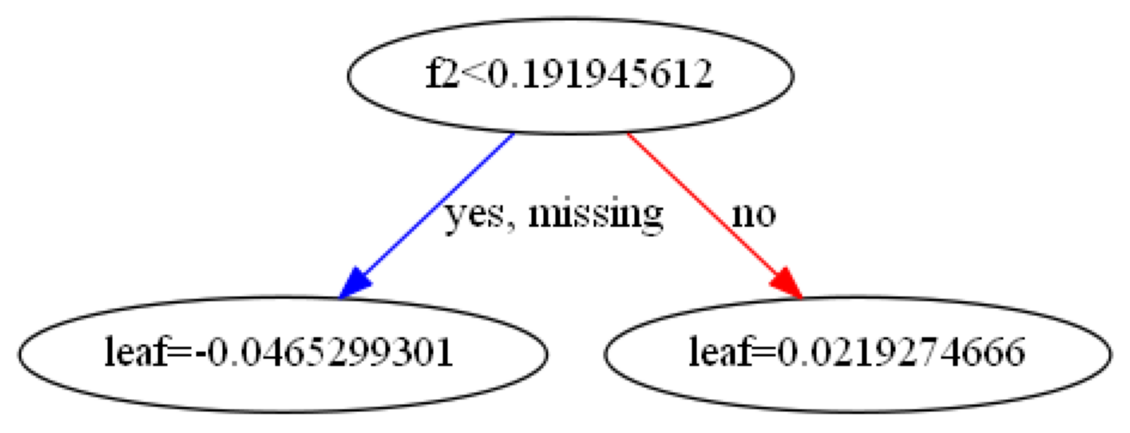

In [79]:
from xgboost import plot_tree
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20, 8))
plot_tree(XGB, num_trees=10, ax=ax)
plt.show()

# KNN:-

In [80]:
#Finding out Best N_Neighbors value of KNN using GridSearchCV.
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

KNN_params = {'n_neighbors': list(range(1,10,1))}

grid_KNN_cla = GridSearchCV(KNeighborsClassifier(), KNN_params, cv = 10)
grid_KNN_cla.fit( X , y)

# Finding out best parameters.
KNN_cla_1 = grid_KNN_cla.best_params_
KNN_cla_1

{'n_neighbors': 6}

In [81]:
# K-Nearest Neighbor(KNN)
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=6)

# Printing all the parameters of KNN
print(clf)

# Creating the model on Training Data
KNN=clf.fit(X_train,y_train)
prediction=KNN.predict(X_test)

TestingDataResults[('KNN_Predicted_'+TargetVariable)]=np.round(prediction)
# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
Accuracy_Values=cross_val_score(clf, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

KNN_Accuracy = round(F1_Score,4)
KNN_CV_Accuracy = round(Accuracy_Values.mean(),4)
#print(KNN_Accuracy,KNN_CV_Accuracy)

TestingDataResults[[TargetVariable,'KNN_Predicted_'+TargetVariable]].head()

KNeighborsClassifier(n_neighbors=6)
              precision    recall  f1-score   support

           0       0.89      0.81      0.84       175
           1       0.82      0.90      0.86       174

    accuracy                           0.85       349
   macro avg       0.85      0.85      0.85       349
weighted avg       0.85      0.85      0.85       349

[[141  34]
 [ 18 156]]
Accuracy of the model on Testing Sample Data: 0.85

Accuracy values for 10-fold Cross Validation:
 [0.7710995  0.84558702 0.68265661 0.82610659 0.83691921 0.83691921
 0.87124594 0.7988793  0.81402191 0.82537598]

Final Average Accuracy of the model: 0.81


,Response,KNN_Predicted_Response
0,0,0
1,0,0
2,1,1
3,0,0
4,1,1


# SVM:-

In [82]:
#Finding out Best Parameters of SVM using GridSearchCV.
from sklearn.model_selection import GridSearchCV
from sklearn import svm

SVM_params = {'C':list(range(4,20,1)), 'gamma':[0.01,0.02,0.03,0.04,0.05,0.1,0.2,0.3,], 'kernel':['rbf' , 'poly', 'sigmoid']}

grid_SVM_cla = GridSearchCV(svm.SVC(), SVM_params)#, cv = 10)
grid_SVM_cla.fit( X , y)

# Finding out best parameters.
SVM_reg_1 = grid_SVM_cla.best_params_
SVM_reg_1

{'C': 9, 'gamma': 0.2, 'kernel': 'rbf'}

In [83]:
# Support Vector Machines(SVM)
from sklearn import svm
clf = svm.SVC(C=9, kernel='rbf', gamma=0.2)

# Printing all the parameters of SVM
print(clf)

# Creating the model on Training Data
SVM=clf.fit(X_train,y_train)
prediction=SVM.predict(X_test)

TestingDataResults[('SVM_Predicted_'+TargetVariable)]=np.round(prediction)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
Accuracy_Values=cross_val_score(clf, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


SVM_Accuracy = round(F1_Score,2)
SVM_CV_Accuracy = round(Accuracy_Values.mean(),2)
#print(SVM_Accuracy,SVM_CV_Accuracy)

TestingDataResults[[TargetVariable,'SVM_Predicted_'+TargetVariable]].head()

SVC(C=9, gamma=0.2)
              precision    recall  f1-score   support

           0       0.88      0.80      0.84       175
           1       0.82      0.89      0.85       174

    accuracy                           0.85       349
   macro avg       0.85      0.85      0.84       349
weighted avg       0.85      0.85      0.84       349

[[140  35]
 [ 19 155]]
Accuracy of the model on Testing Sample Data: 0.84

Accuracy values for 10-fold Cross Validation:
 [0.80555556 0.82222222 0.81033138 0.79448961 0.75769472 0.82537598
 0.81402191 0.78817755 0.84726588 0.8159251 ]

Final Average Accuracy of the model: 0.81


,Response,SVM_Predicted_Response
0,0,0
1,0,0
2,1,1
3,0,0
4,1,0


# Naive Bayes:-

In [84]:
# Naive Bays
from sklearn.naive_bayes import GaussianNB, MultinomialNB

clf = GaussianNB()

# Printing all the parameters of Naive Bayes
print(clf)

NB=clf.fit(X_train,y_train)
prediction=NB.predict(X_test)

TestingDataResults[('NBayes_Predicted_'+TargetVariable)]=np.round(prediction)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
Accuracy_Values=cross_val_score(clf, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


NBayes_Accuracy = round(F1_Score,2)
NBayes_CV_Accuracy = round(Accuracy_Values.mean(),2)
#print(NBayes_Accuracy,NBayes_CV_Accuracy)

TestingDataResults[[TargetVariable,'NBayes_Predicted_'+TargetVariable]].head()

GaussianNB()
              precision    recall  f1-score   support

           0       0.88      0.80      0.84       175
           1       0.81      0.89      0.85       174

    accuracy                           0.84       349
   macro avg       0.84      0.84      0.84       349
weighted avg       0.84      0.84      0.84       349

[[140  35]
 [ 20 154]]
Accuracy of the model on Testing Sample Data: 0.84

Accuracy values for 10-fold Cross Validation:
 [0.81349206 0.78753806 0.75050505 0.81013431 0.84648773 0.82257513
 0.77505291 0.82257513 0.79531698 0.81061124]

Final Average Accuracy of the model: 0.8


,Response,NBayes_Predicted_Response
0,0,0
1,0,0
2,1,1
3,0,0
4,1,0


# Best Model For Deployment:-

In [85]:
TestingDataResults[[TargetVariable,'LR_Predicted_'+TargetVariable,'DT_Predicted_'+TargetVariable,'RF_Predicted_'+TargetVariable,'AB_Predicted_'+TargetVariable,'XB_Predicted_'+TargetVariable,'KNN_Predicted_'+TargetVariable,'SVM_Predicted_'+TargetVariable,'NBayes_Predicted_'+TargetVariable]].head()

,Response,LR_Predicted_Response,DT_Predicted_Response,RF_Predicted_Response,AB_Predicted_Response,XB_Predicted_Response,KNN_Predicted_Response,SVM_Predicted_Response,NBayes_Predicted_Response
0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0
2,1,1,1,1,1,1,1,1,1
3,0,0,0,0,0,0,0,0,0
4,1,0,1,1,1,1,1,0,0


In [86]:
best_model = pd.DataFrame()

best_model['Model_Name'] = ['Logistic_Regression', 'Decision_Trees', 'Random_Forest', 'AdaBoost', 'XGBoost', 'KNN','SVM','Naive_Bayes']
best_model['Model_Accuracy'] = [LR_Accuracy, DT_Accuracy, RF_Accuracy, AB_Accuracy, XB_Accuracy, KNN_Accuracy, SVM_Accuracy, NBayes_Accuracy]
best_model['CV_Accuracy'] = [LR_CV_Accuracy, DT_CV_Accuracy, RF_CV_Accuracy, AB_CV_Accuracy, XB_CV_Accuracy, KNN_CV_Accuracy, SVM_CV_Accuracy, NBayes_CV_Accuracy]
print(best_model)

print('\n\nPer', BOLD, 'Model Accuracy',RESET, 'Best Model is:-', BOLD ,CYAN , best_model.loc[best_model['Model_Accuracy'].idxmax(), 'Model_Name'],'(',best_model.loc[best_model['Model_Accuracy'].idxmax(), 'Model_Accuracy'],').',RESET)
print('Per', BOLD, 'Cross Validation Accuracy',RESET, ' Best Model is:-', BOLD ,RED , best_model.loc[best_model['CV_Accuracy'].idxmax(), 'Model_Name'],'(',best_model.loc[best_model['CV_Accuracy'].idxmax(), 'CV_Accuracy'],').',RESET)

            Model_Name  Model_Accuracy  CV_Accuracy
0  Logistic_Regression         0.82435     0.798045
1       Decision_Trees         0.86490     0.838000
2        Random_Forest         0.86170     0.795200
3             AdaBoost         0.86190     0.828900
4              XGBoost         0.86450     0.838300
5                  KNN         0.85070     0.810900
6                  SVM         0.84000     0.810000
7          Naive_Bayes         0.84000     0.800000


Per  Model Accuracy  Best Model is:-   Decision_Trees ( 0.8649 ). 
Per  Cross Validation Accuracy   Best Model is:-   XGBoost ( 0.8383 ). 


# Deployment of the Model:-
### &emsp;  &emsp;  Based on the above trials, - Decision Tree - algorithm produces the best average accuracy. Hence, I am choosing - Decision Tree - as the final model.

### Choosing only the most important variables:-

<b>'Age', 'Vehicle_Damage', 'Previously_Insured' </b> These are consistently on top of the variable importance chart for every algorithm. Hence choosing these as final set of predictor variables.

In [87]:
# Separate Target Variable and Predictor Variables
TargetVariable='Response'

# Selecting the final set of predictors for the deployment Based on the variable importance charts of multiple algorithms
Predictors=['Age', 'Vehicle_Damage', 'Previously_Insured']

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

### Sandardization of data
from sklearn.preprocessing import StandardScaler, MinMaxScaler
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

print(X.shape)
print(y.shape)

(714, 3)
(714,)


# Step 1. Retraining the model with 100% data & selected Predictors:-

In [88]:
# Decision-Tree 
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=3,criterion='entropy')

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
Accuracy_Values=cross_val_score(clf, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),5))


Accuracy values for 10-fold Cross Validation:
 [0.84876543 0.83170234 0.82196844 0.83667482 0.87050845 0.84792154
 0.81061124 0.85652754 0.84648773 0.80907064]

Final Average Accuracy of the model: 0.83802


### Find out the best Parameters for the selected model using GridSearchCV:-

In [89]:
#Finding out Best Parameters of Decision Tree using GridSearchCV.
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

#Decision Tree Parameters
DT_cla_params = {'max_depth': list(range(1,20,1)), "criterion": ['gini', 'entropy']}

grid_DT_cla = GridSearchCV(DecisionTreeClassifier(), DT_cla_params, cv = 10)
grid_DT_cla.fit(X,y)

# Finding out best parameters.
DT_cla_1 = grid_DT_cla.best_params_

DT_cla_1

{'criterion': 'entropy', 'max_depth': 4}

## So, Best Parameter For the Decision Tree model is 'criterion'= 'entropy', 'max_depth'= 4. Retraining the model once again using 100% data on this parameters

In [90]:
# Decision-Tree 
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=4,criterion='entropy')
Final_DTree_Model= clf.fit(X , y)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
Accuracy_Values=cross_val_score(clf, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),5))


Accuracy values for 10-fold Cross Validation:
 [0.86793372 0.82578425 0.85258667 0.81995885 0.85447999 0.83553955
 0.81244131 0.79627198 0.8903597  0.81871184]

Final Average Accuracy of the model: 0.83741


# Step 2. Save the model as a serialized file which can be stored anywhere:-

In [91]:
import pickle
import os

# Saving the Python objects as serialized files.

with open('Final_DTree_Model.pkl', 'wb') as fileWriteStream:
    pickle.dump(Final_DTree_Model, fileWriteStream)
    fileWriteStream.close()
    
print('pickle file of Predictive Model is saved at Location:',os.getcwd())

pickle file of Predictive Model is saved at Location: C:\Users\Pranab_Kumar_Paul\Desktop\Python_Script\My_Script\Python_Project(GitHub)\Classification\Classification_Vehicle_Insurance


# Step 3. Create a python function:-

In [92]:
# This Function can be called from any from any front end tool/website

def FunctionPredictResult(InputData):
    import pandas as pd
    Num_Inputs=InputData.shape[0]

    
    # Appending the new data with the Training data
    DataForML=pd.read_pickle('DataForML.pkl')
    InputData=InputData.append(DataForML)
    
    # Converting the binary nominal variable sex to numeric
    InputData['Vehicle_Damage'].replace({'No':0, 'Yes':1}, inplace=True)
    
    # Generating dummy variables for rest of the nominal variables
    InputData=pd.get_dummies(InputData)
            
    # Maintaining the same order of columns as it was during the model training
    Predictors= ['Age', 'Vehicle_Damage', 'Previously_Insured']
    
    # Generating the input values to the model
    X=InputData[Predictors].values[0:Num_Inputs]
    
    # Generating the standardized values of X since it was done while model training also
    X=PredictorScalerFit.transform(X)
    
    # Loading the Function from pickle file
    import pickle
    with open('Final_DTree_Model.pkl', 'rb') as fileReadStream:
        PredictionModel=pickle.load(fileReadStream)
        fileReadStream.close()
            
    # Genrating Predictions
    Prediction=PredictionModel.predict(X)
    PredictionResult=pd.DataFrame(Prediction, columns=['Predicted Status'])
    return(PredictionResult)

In [93]:
# Calling the function for some new case to test
NewSampleData=pd.DataFrame(
                        data=[[71,'Yes',1],
                              [50,'No',0]],
                     columns=['Age', 'Vehicle_Damage', 'Previously_Insured'])

print(NewSampleData)

# Calling the Function for prediction
FunctionPredictResult(InputData= NewSampleData)

   Age Vehicle_Damage  Previously_Insured
0   71            Yes                   1
1   50             No                   0


,Predicted Status
0,0
1,0


# Deploying a predictive model as an API:-
## Creating the model with few parameters
## - Function for predictions API

In [94]:
# Creating the function which can take inputs and return predictions
def FunctionGeneratePrediction(inp_Age ,inp_Vehicle_Damage, inp_Previously_Insured):
    
    # Creating a data frame for the model input
    SampleInputData=pd.DataFrame(
     data=[[inp_Age ,inp_Vehicle_Damage, inp_Previously_Insured]],
     columns= ['Age', 'Vehicle_Damage', 'Previously_Insured'])

    # Calling the function defined above using the input parameters
    Predictions=FunctionPredictResult(InputData= SampleInputData)

    # Returning the predictions
    return(Predictions.to_json())

# Calling the Function
FunctionGeneratePrediction(  inp_Age= 71,
                             inp_Vehicle_Damage= 'No',
                             inp_Previously_Insured= 0
                             )

'{"Predicted Status":{"0":0}}'

# Creating Flask API:-

In [95]:
#!pip install flask

from flask import Flask, request, jsonify
import pickle
import pandas as pd
import numpy

In [96]:
app = Flask(__name__)

@app.route('/prediction_api', methods=["GET"])
def prediction_api():
    try:
        # Getting the paramters from API call
        Age_value= float(request.args.get('Age'))
        Vehicle_Damage_value= request.args.get('Vehicle_Damage')
        Previously_Insured_value= float(request.args.get('Previously_Insured'))
      
        # Calling the funtion to get predictions
        prediction_from_api=FunctionGeneratePrediction(
                                                    inp_Age=Age_value,
                                                    inp_Vehicle_Damage=Vehicle_Damage_value,
                                                    inp_Previously_Insured=Previously_Insured_value
                                                      )

        return (prediction_from_api)
    
    except Exception as e:
        return('Something is not right!:'+str(e))

# Starting the API engine:-

In [100]:
import os
if __name__ =="__main__":
    
    # Hosting the API in localhost
    app.run(host='127.0.0.1', port=8080, threaded=True, debug=True, use_reloader=False)
    # Interrupt kernel to stop the API

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


 * Running on http://127.0.0.1:8080/ (Press CTRL+C to quit)
127.0.0.1 - - [18/Jun/2021 13:13:59] "GET /prediction_api?Age=71&Vehicle_Damage=Yes&Previously_Insured=0 HTTP/1.1" 200 -


# Sample URL to call the API:-

#### Copy and paste below URL in the web browser
http://127.0.0.1:8080/prediction_api?Age=71&Vehicle_Damage=Yes&Previously_Insured=0